作業目標:<br>
1. 熟悉索引與欄位設定
2. 使用樞紐建立新資料

作業重點:<br>
1. 多維度索引、欄位是有順序性的須注意
2. 使用樞紐建立資料需要注意參數<br>
  index : 新資料的索引名稱<br>
  columns : 新資料的欄位名稱<br>
  values :新資料的值名稱


題目: 運用下列分數資料重新建構資料，將索引(index)依序改為sex、class、student_id，欄位依序改成chinese_score、english_score、math_score<br><br>
score_df = pd.DataFrame([[1,50,80,70,'boy',1],[2,60,45,50,'boy',2],[3,98,43,55,'boy',1],[4,70,69,89,'boy',2],[5,56,79,60,'girl',1],[6,60,68,55,'girl',2],[7,45,70,77,'girl',1],[8,55,77,76,'girl',2],[9,25,57,60,'girl',1],[10,88,40,43,'girl',3],[11,25,60,45,'boy',3],[12,80,60,23,'boy',3],[13,20,90,66,'girl',3],[14,50,50,50,'girl',3],[15,89,67,77,'girl',3]],columns=['student_id','math_score','english_score','chinese_score','sex','class'])


In [5]:
import pandas as pd
import numpy as np
score_df = pd.DataFrame([[1,50,80,70,'boy',1],[2,60,45,50,'boy',2],[3,98,43,55,'boy',1],[4,70,69,89,'boy',2],[5,56,79,60,'girl',1],[6,60,68,55,'girl',2],[7,45,70,77,'girl',1],[8,55,77,76,'girl',2],[9,25,57,60,'girl',1],[10,88,40,43,'girl',3],[11,25,60,45,'boy',3],[12,80,60,23,'boy',3],[13,20,90,66,'girl',3],[14,50,50,50,'girl',3],[15,89,67,77,'girl',3]],columns=['student_id','math_score','english_score','chinese_score','sex','class'])
score_df

,student_id,math_score,english_score,chinese_score,sex,class
0,1,50,80,70,boy,1
1,2,60,45,50,boy,2
2,3,98,43,55,boy,1
3,4,70,69,89,boy,2
4,5,56,79,60,girl,1
5,6,60,68,55,girl,2
6,7,45,70,77,girl,1
7,8,55,77,76,girl,2
8,9,25,57,60,girl,1
9,10,88,40,43,girl,3


In [68]:
sex_df=score_df[['sex','class']]
pd.get_dummies(sex_df['sex'])
new_df=pd.concat([pd.get_dummies(sex_df['sex']),sex_df['class']],axis=1)

<AxesSubplot:xlabel='class'>

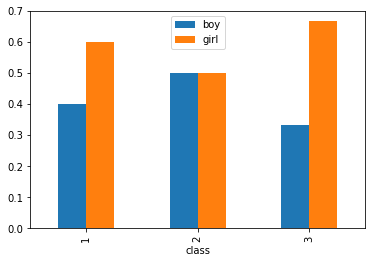

In [119]:
# new_df.groupby(by=new_df['class'])
# for i in new_df.groupby(by=new_df['class']):
#     print(i)
new_df.melt(id_vars=['class'])
new_df.pivot_table(index=['class']).plot.bar()


In [43]:
df=score_df.melt(id_vars=['sex','class','student_id'])

,sex,class,student_id,variable,value
0,boy,1,1,math_score,50
1,boy,2,2,math_score,60
2,boy,1,3,math_score,98
3,boy,2,4,math_score,70
4,girl,1,5,math_score,56
5,girl,2,6,math_score,60
6,girl,1,7,math_score,45
7,girl,2,8,math_score,55
8,girl,1,9,math_score,25
9,girl,3,10,math_score,88


In [46]:
#將索引(index)依序改為sex、class、student_id，欄位依序改成chinese_score、english_score、math_score
df.pivot_table(index=['sex','class','student_id'],columns=['variable'])

value                         
variable              chinese_score english_score math_score
sex  class student_id                                       
boy  1     1                     70            80         50
           3                     55            43         98
     2     2                     50            45         60
           4                     89            69         70
     3     11                    45            60         25
           12                    23            60         80
girl 1     5                     60            79         56
           7                     77            70         45
           9                     60            57         25
     2     6                     55            68         60
           8                     76            77         55
     3     10                    43            40         88
           13                    66            90         20
           14                    50            50         50
           15                    77            67         89